In [9]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f50b5441-62b4-a6b6-f290-d23fccbecda4)


In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [11]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2021-03-21 02:32:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.5.240, 172.217.12.240, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.5.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-03-21 02:32:46 (152 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [12]:
data = open('/tmp/sonnets.txt').read()
corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [13]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(120, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(96))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))


model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 128)           411008    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 240)           239040    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 240)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                129408    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              155685    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,092,007
Trainable params: 6,092,007
Non-trainable params: 0
____________________________________________

In [14]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 9s 12ms/step - loss: 7.3529 - accuracy: 0.0196
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.5156 - accuracy: 0.0197
Epoch 3/100
484/484 [==============================] - 6s 12ms/step - loss: 6.3987 - accuracy: 0.0239
Epoch 4/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2530 - accuracy: 0.0277
Epoch 5/100
484/484 [==============================] - 6s 13ms/step - loss: 6.1553 - accuracy: 0.0376
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.0691 - accuracy: 0.0378
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 5.9938 - accuracy: 0.0425
Epoch 8/100
484/484 [==============================] - 6s 12ms/step - loss: 5.9153 - accuracy: 0.0417
Epoch 9/100
484/484 [==============================] - 6s 12ms/step - loss: 5.7773 - accuracy: 0.0503
Epoch 10/100
484/484 [==============================] - 6s 12ms/step - loss: 5.700

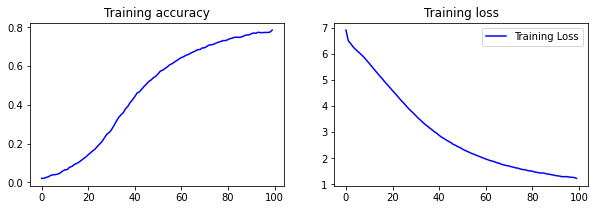

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [18]:
seed_text = "I am a stone sitting alone"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I am a stone sitting alone upon his gains sounds sounds fall on hate bearing held dote set back so bring to decay wastes me pride from thee may fortify contains go argument belong one one one one one one one one ' on thee none contains none sought find bright days respect threw dyed grow rage forth shown shown bow decrease fall on praise due and thee abused born fair one one one one one ' so last so old old praise rehearse young to trust forth every end prove thine eyes ' on dwell was born days were strong part be well faith behold
